In [2]:
# Libraries for all projects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Prediciting Ice Cream Sales: Supervised Learning Example

In [82]:
# Generate data
np.random.seed(42)
temperature = np.random.normal(30, 10, 100)
ice_cream_sales = 5 * temperature + np.random.normal(0, 20, 100)
print(temperature)
print(ice_cream_sales)

[34.96714153 28.61735699 36.47688538 45.23029856 27.65846625 27.65863043
 45.79212816 37.67434729 25.30525614 35.42560044 25.36582307 25.34270246
 32.41962272 10.86719755 12.75082167 24.37712471 19.8716888  33.14247333
 20.91975924 15.87696299 44.65648769 27.742237   30.67528205 15.75251814
 24.55617275 31.1092259  18.49006423 33.75698018 23.9936131  27.0830625
 23.98293388 48.52278185 29.86502775 19.42289071 38.22544912 17.7915635
 32.08863595 10.40329876 16.71813951 31.96861236 37.3846658  31.71368281
 28.84351718 26.98896304 15.2147801  22.80155792 25.39361229 40.57122226
 33.4361829  12.36959845 33.24083969 26.1491772  23.23078    36.11676289
 40.30999522 39.31280119 21.60782477 26.90787624 33.31263431 39.75545127
 25.20825762 28.14341023 18.93665026 18.03793376 38.12525822 43.56240029
 29.27989878 40.03532898 33.61636025 23.54880245 33.61395606 45.38036566
 29.64173961 45.64643656  3.80254896 38.21902504 30.87047068 27.0099265
 30.91760777 10.12431085 27.80328112 33.57112572 44.77

In [83]:
# split the data
from sklearn.model_selection import train_test_split    # useful for evaluating the performance of your model
X = temperature.reshape(-1, 1)                          # reshape for the features matrix
y = ice_cream_sales                                     # set target vector
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, 
                                                random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression   # 1. choose model class
model = LinearRegression()                          # 2. instantiate model
model.fit(Xtrain, ytrain)                           # 3. fit model to data
y_model = model.predict(Xtest)                      # 4. predict on new data

In [85]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_model)
r2 = r2_score(ytest, y_model)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 349.14
R-squared: 0.80


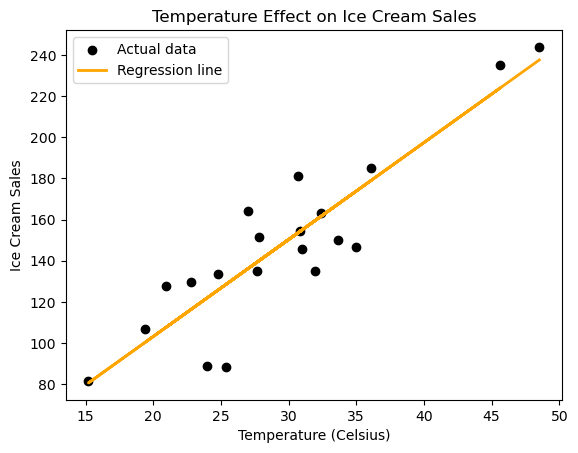

In [86]:
plt.scatter(Xtest, ytest, color='black', label='Actual data')
plt.plot(Xtest, y_model, color='orange', linewidth=2, label='Regression line')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Ice Cream Sales')
plt.title('Temperature Effect on Ice Cream Sales')
plt.legend();

## Pokemon Classification

* *Purpose*: Make a model to predict whether a Pokemon is legnedary or not based on its attributes such as Attack, HP, Defense, etc.

In [3]:
# Import data
poke_df = pd.read_csv("CSV\\pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [34]:
# Define data
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation']
X = poke_df[features]  # features matrix
y = poke_df['Legendary']                                                      # target vector

In [35]:
# Split data into training and tests sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, 
                                                random_state=42)


In [36]:
from sklearn.ensemble import RandomForestClassifier     # 1. choose model class
model = RandomForestClassifier()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                               # 3. fit model to data
ypred = model.predict(Xtest)                            # 4. predict on new data

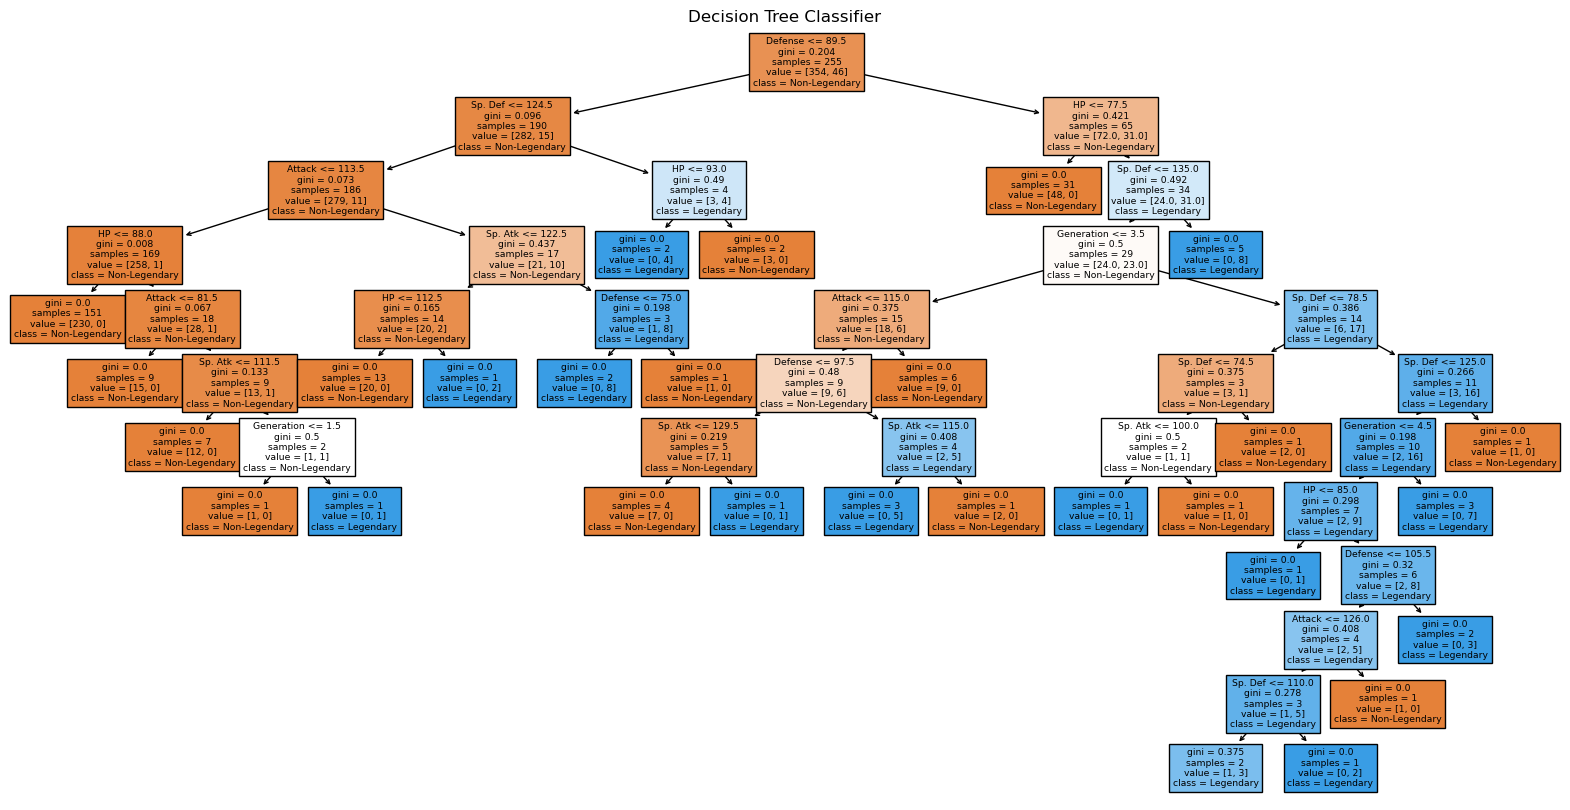

In [38]:
# Visualizing the decision tree
# Extract a single tree from RandomForest Classifier
tree_index = 0  # Indecx of the tree to visualize
single_tree = model.estimators_[tree_index]

# Plot the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(single_tree, feature_names=features, class_names=['Non-Legendary', 'Legendary'], filled=True)
plt.title('Decision Tree Classifier');

In [15]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(ytest, ypred))

Accuracy: 0.95
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       372
        True       0.67      0.50      0.57        28

    accuracy                           0.95       400
   macro avg       0.81      0.74      0.77       400
weighted avg       0.94      0.95      0.94       400



using confusion matrix display from scikit-learn

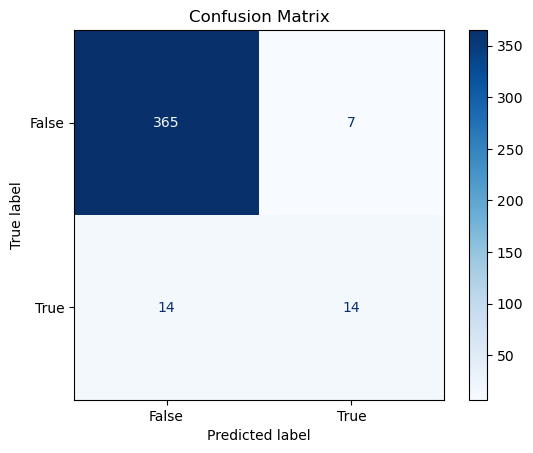

In [16]:
# visualizing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ypred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix');


Using a seaborn heat map

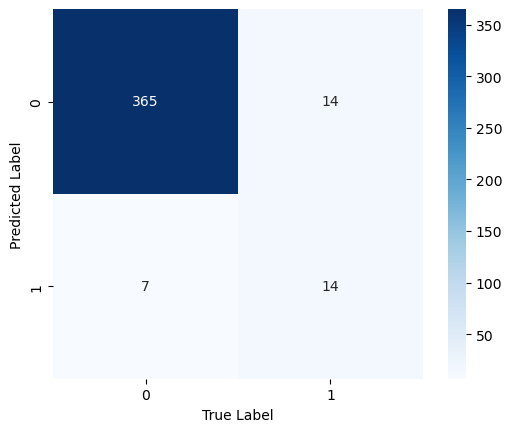

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='Blues', cbar=True);
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

## Apples, Oranges, and Bananas Classification

In [87]:
# Creating the dataset

data = {
     'Weight': [150, 160, 170, 130, 140, 135, 155, 120, 110, 145, 200, 210, 220, 215, 205],
    'Color': ['Red', 'Red', 'Red', 'Red', 'Red', 'Orange', 'Orange', 'Orange', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow'],
    'Size': ['Medium', 'Medium', 'Medium', 'Small', 'Small', 'Medium', 'Medium', 'Small', 'Small', 'Small', 'Large', 'Large', 'Large', 'Large', 'Large'],
    'Fruit': ['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Banana', 'Banana', 'Banana', 'Banana', 'Banana', 'Banana', 'Banana']
}

fruit_df = pd.DataFrame(data)
fruit_df

,Weight,Color,Size,Fruit
0,150,Red,Medium,Apple
1,160,Red,Medium,Apple
2,170,Red,Medium,Apple
3,130,Red,Small,Apple
4,140,Red,Small,Apple
5,135,Orange,Medium,Orange
6,155,Orange,Medium,Orange
7,120,Orange,Small,Orange
8,110,Yellow,Small,Banana
9,145,Yellow,Small,Banana
